# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : [Enter your name] 🖊  
* **Last Name** : [Enter your last name] 📝  
* **SID** : [Enter your SID] 🆔

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint

In [2]:
file_path = 'hotels_in_europe.csv'
df = pd.read_csv(file_path)
df

,name,location,price,rating,quality,review,bed,size,distance_from_center,room_type,nights,adults,free_cancellation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,"Mitte, Berlin","IRR 31,998,398",8.0,Very good,"5,933 reviews",Beds: 1 double or 2 singles,NaN,0.9,Superior Double Room,4 nights,2 adults,NaN
7318,Hotel Domicil Berlin by Golden Tulip,"Charlottenburg-Wilmersdorf, Berlin","IRR 14,817,781",7.7,Good,"1,546 reviews",2 single beds,NaN,4.9,Standard Twin Room,4 nights,2 adults,NaN
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...","Charlottenburg, Berlin","IRR 30,236,284",8.3,Very good,"5,813 reviews",Multiple bed types,NaN,2.8,Standard Room,4 nights,2 adults,NaN
7320,Leonardo Hotel Berlin KU'DAMM,"Charlottenburg-Wilmersdorf, Berlin","IRR 19,503,404",8.0,Very good,"8,631 reviews",Beds: 1 double or 2 singles,NaN,3.9,Comfort Double Room,4 nights,2 adults,Free cancellation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7322 non-null   object 
 1   location              7322 non-null   object 
 2   price                 7322 non-null   object 
 3   rating                7129 non-null   float64
 4   quality               7169 non-null   object 
 5   review                7169 non-null   object 
 6   bed                   7299 non-null   object 
 7   size                  2454 non-null   object 
 8   distance_from_center  7322 non-null   float64
 9   room_type             7322 non-null   object 
 10  nights                7322 non-null   object 
 11  adults                7322 non-null   object 
 12  free_cancellation     583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


In [4]:
df.describe()

,rating,distance_from_center
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


In [5]:
df.isnull().sum()

name                       0
location                   0
price                      0
rating                   193
quality                  153
review                   153
bed                       23
size                    4868
distance_from_center       0
room_type                  0
nights                     0
adults                     0
free_cancellation       6739
dtype: int64

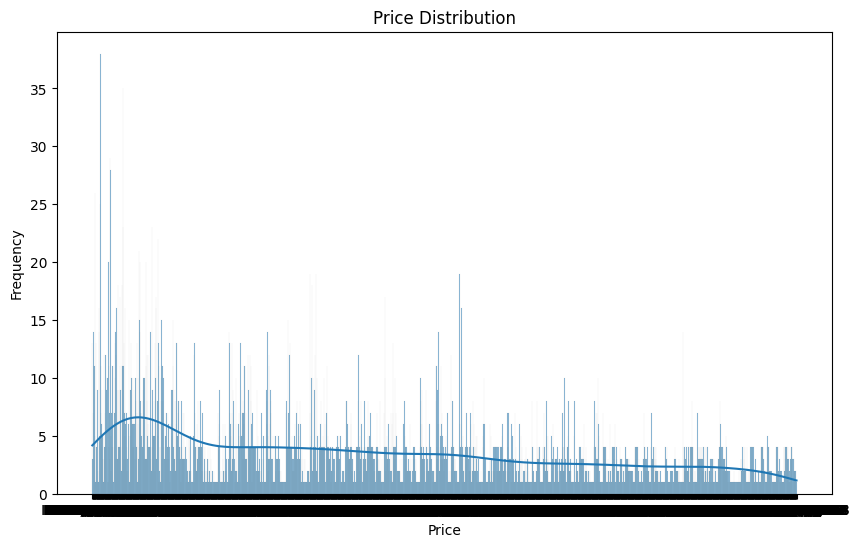

In [6]:
# Plot the distribution of hotel prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


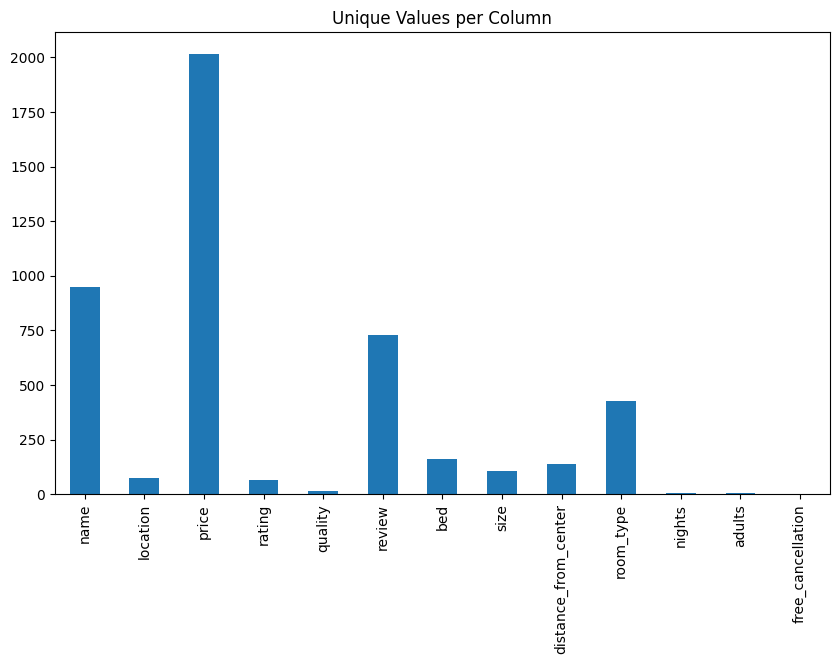

In [7]:
unique_counts = df.nunique()
unique_counts.plot(kind='bar', figsize=(10, 6), title='Unique Values per Column')
plt.show()


### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [8]:
def clean_price(amount):
    amount = amount.replace('IRR', '').replace(',', '').strip()
    return int(amount)

df['price'] = df['price'].apply(clean_price)
df['price']

0        7951542
1        1397677
2        7569083
3        6447737
4        7913496
          ...   
7317    31998398
7318    14817781
7319    30236284
7320    19503404
7321    25871045
Name: price, Length: 7322, dtype: int64

### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [9]:
#hazf sotoon quality chon ahamiyat ziadi ndre v hamon rating kafie
df = df.drop(columns=['quality'])
print(df.columns)

Index(['name', 'location', 'price', 'rating', 'review', 'bed', 'size',
       'distance_from_center', 'room_type', 'nights', 'adults',
       'free_cancellation'],
      dtype='object')


In [10]:
#hazf null dar in  2 sotoon
df = df.dropna(subset=['rating'])
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7129 entries, 0 to 7321
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7129 non-null   object 
 1   location              7129 non-null   object 
 2   price                 7129 non-null   int64  
 3   rating                7129 non-null   float64
 4   review                7129 non-null   object 
 5   bed                   7106 non-null   object 
 6   size                  2365 non-null   object 
 7   distance_from_center  7129 non-null   float64
 8   room_type             7129 non-null   object 
 9   nights                7129 non-null   object 
 10  adults                7129 non-null   object 
 11  free_cancellation     583 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 724.0+ KB
None


name                       0
location                   0
price                      0
rating                     0
review                     0
bed                       23
size                    4764
distance_from_center       0
room_type                  0
nights                     0
adults                     0
free_cancellation       6546
dtype: int64

In [11]:
# hazf kama v kalame reviews braye sadesazi
def clean_review(amount):
    amount = amount.replace('reviews', '').replace('review', '').replace(',', '')
    return int(amount.strip())

df['review'] = df['review'].apply(clean_review)
df['review']


0        3300
1        5921
2        2532
3        1457
4        1273
        ...  
7317     5933
7318     1546
7319     5813
7320     8631
7321    12360
Name: review, Length: 7129, dtype: int64

In [12]:
# hazf kalame night va nights
def clean_nights(amount):
    cleaned_amount = amount.replace('nights', '').replace('night', '')
    return int(cleaned_amount.strip())
df['nights'] = df['nights'].apply(clean_nights)
df['nights']


0       1
1       1
2       1
3       1
4       1
       ..
7317    4
7318    4
7319    4
7320    4
7321    4
Name: nights, Length: 7129, dtype: int64

In [13]:
# hazf kalame adukt va adults
def clean_nights(amount):
    cleaned_amount = amount.replace('adults', '').replace('adult', '')
    return int(cleaned_amount.strip())
df['adults'] = df['adults'].apply(clean_nights)
df['adults']


0       1
1       1
2       1
3       1
4       1
       ..
7317    2
7318    2
7319    2
7320    2
7321    2
Name: adults, Length: 7129, dtype: int64

In [14]:
# sadesazie sotoon bed
def clean_bed(amount):
    if pd.notna(amount):
        for char in amount:  
            if char.isnumeric():  
                return int(char)
    return 2

df['bed'] = df['bed'].apply(clean_bed)
df['bed']


0       1
1       1
2       1
3       1
4       1
       ..
7317    1
7318    2
7319    2
7320    1
7321    1
Name: bed, Length: 7129, dtype: int64

In [15]:
# por kardan jahaye khali ba min v tabdil kardan maghadir be float
def clean_size(amount, target_b, df):
    if pd.notna(amount):
        return amount
    else:
        similar_rooms = df[
            (df['bed'] == target_b) &
            df['size'].notna()
        ]

        average_size = similar_rooms['size'].mean()

        if np.isnan(average_size):
            return df['size'].mean()
        else:
            return average_size

df['size'] = df['size'].apply(lambda x: float(x[:-2].strip()) if pd.notna(x) else np.nan)
df['size'] = df.apply(lambda row: clean_size(row['size'], row['bed'], df), axis=1)
df['size']


0       20.000000
1       40.152284
2       40.152284
3       40.152284
4       40.152284
          ...    
7317    40.152284
7318    39.351942
7319    39.351942
7320    40.152284
7321    40.152284
Name: size, Length: 7129, dtype: float64

In [16]:
# hazf sotoon room type be dalil dashtan meghdar yekta ziad ke ghabel moghayese nist
df = df.drop(columns=['room_type'])
print(df.columns)

Index(['name', 'location', 'price', 'rating', 'review', 'bed', 'size',
       'distance_from_center', 'nights', 'adults', 'free_cancellation'],
      dtype='object')


In [17]:
#maghadir 0 or 1 midim bejaye yes ya no
def free_cancellation(amount):
    return 1 if pd.notna(amount) else 0

df['free_cancellation'] = df['free_cancellation'].map(lambda x: free_cancellation(x))
df['free_cancellation']


0       0
1       0
2       0
3       0
4       0
       ..
7317    0
7318    0
7319    0
7320    1
7321    1
Name: free_cancellation, Length: 7129, dtype: int64

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [18]:

df = df.assign(
    price_of_one_night=(df['price'].astype(float) / df['nights'].astype(float))
)
df[['area', 'city']] = df['location'].str.split(', ', expand=True)
df['city'] = df['city'].fillna(df['area'])
df = df.drop(columns=['location', 'price', 'nights'])
df



,name,rating,review,bed,size,distance_from_center,adults,free_cancellation,price_of_one_night,area,city
0,WIT Hotel,7.1,3300,1,20.000000,1.9,1,0,7951542.00,9th arr.,Paris
1,UCPA SPORT STATION HOSTEL PARIS,8.0,5921,1,40.152284,4.6,1,0,1397677.00,19th arr.,Paris
2,Timhotel Montmartre,8.3,2532,1,40.152284,3.4,1,0,7569083.00,18th arr.,Paris
3,Hôtel Galileo Champs Elysées,8.6,1457,1,40.152284,4.2,1,0,6447737.00,8th arr.,Paris
4,Hôtel Le Daum,8.3,1273,1,40.152284,4.1,1,0,7913496.00,12th arr.,Paris
...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,8.0,5933,1,40.152284,0.9,2,0,7999599.50,Mitte,Berlin
7318,Hotel Domicil Berlin by Golden Tulip,7.7,1546,2,39.351942,4.9,2,0,3704445.25,Charlottenburg-Wilmersdorf,Berlin
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...",8.3,5813,2,39.351942,2.8,2,0,7559071.00,Charlottenburg,Berlin
7320,Leonardo Hotel Berlin KU'DAMM,8.0,8631,1,40.152284,3.9,2,1,4875851.00,Charlottenburg-Wilmersdorf,Berlin


### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [19]:
def assign_label(x, column):
    """
        x: price (int),
        column: "price" (str),
        returns label of x as explained
    """
    threshold = df[column].median()
    return 0 if x < threshold else 1

df['price_label'] = df['price_of_one_night'].apply(lambda x: assign_label(x, 'price_of_one_night'))
df = df.drop(columns=['price_of_one_night'])
df



,name,rating,review,bed,size,distance_from_center,adults,free_cancellation,area,city,price_label
0,WIT Hotel,7.1,3300,1,20.000000,1.9,1,0,9th arr.,Paris,1
1,UCPA SPORT STATION HOSTEL PARIS,8.0,5921,1,40.152284,4.6,1,0,19th arr.,Paris,0
2,Timhotel Montmartre,8.3,2532,1,40.152284,3.4,1,0,18th arr.,Paris,0
3,Hôtel Galileo Champs Elysées,8.6,1457,1,40.152284,4.2,1,0,8th arr.,Paris,0
4,Hôtel Le Daum,8.3,1273,1,40.152284,4.1,1,0,12th arr.,Paris,0
...,...,...,...,...,...,...,...,...,...,...,...
7317,Eurostars Berlin,8.0,5933,1,40.152284,0.9,2,0,Mitte,Berlin,1
7318,Hotel Domicil Berlin by Golden Tulip,7.7,1546,2,39.351942,4.9,2,0,Charlottenburg-Wilmersdorf,Berlin,0
7319,"Crowne Plaza Berlin City Centre Ku'damm, an IH...",8.3,5813,2,39.351942,2.8,2,0,Charlottenburg,Berlin,0
7320,Leonardo Hotel Berlin KU'DAMM,8.0,8631,1,40.152284,3.9,2,1,Charlottenburg-Wilmersdorf,Berlin,0


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7129 entries, 0 to 7321
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7129 non-null   object 
 1   rating                7129 non-null   float64
 2   review                7129 non-null   int64  
 3   bed                   7129 non-null   int64  
 4   size                  7129 non-null   float64
 5   distance_from_center  7129 non-null   float64
 6   adults                7129 non-null   int64  
 7   free_cancellation     7129 non-null   int64  
 8   area                  7129 non-null   object 
 9   city                  7129 non-null   object 
 10  price_label           7129 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 668.3+ KB


,rating,review,bed,size,distance_from_center,adults,free_cancellation,price_label
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000
mean,7.742783,3059.232992,2.307336,51.293278,25.263403,3.293870,0.081779,0.500351
std,1.128965,3960.958370,1.274129,26.793966,83.475456,1.193378,0.274046,0.500035
min,1.000000,1.000000,1.000000,10.000000,0.500000,1.000000,0.000000,0.000000
25%,7.300000,214.000000,1.000000,39.351942,2.200000,2.000000,0.000000,0.000000
50%,8.000000,1677.000000,2.000000,40.152284,3.800000,3.000000,0.000000,1.000000
75%,8.400000,4233.000000,3.000000,61.979090,5.800000,4.000000,0.000000,1.000000
max,10.000000,25125.000000,9.000000,550.000000,500.000000,5.000000,1.000000,1.000000


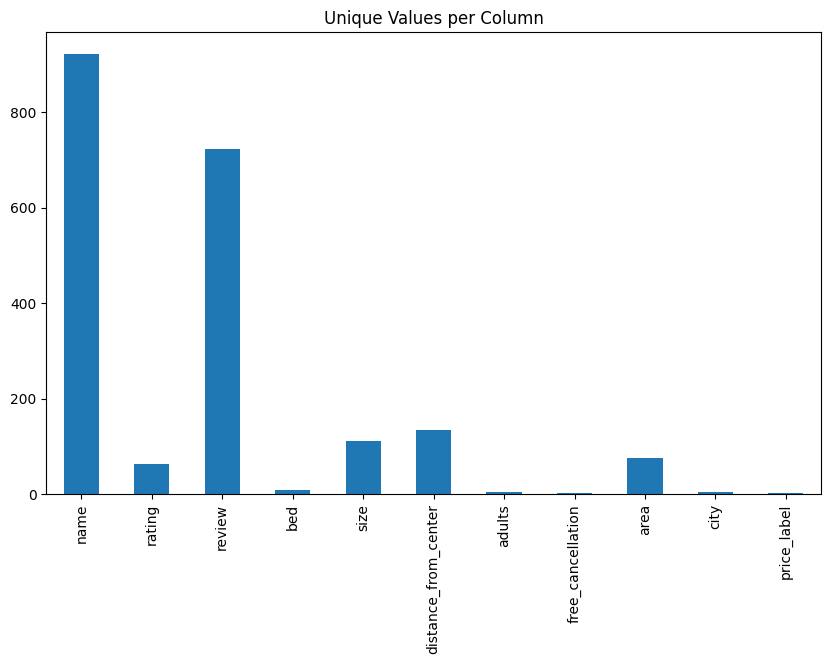

In [21]:
unique_counts = df.nunique()
unique_counts.plot(kind='bar', figsize=(10, 6), title='Unique Values per Column')
plt.show()


##  Heatmap

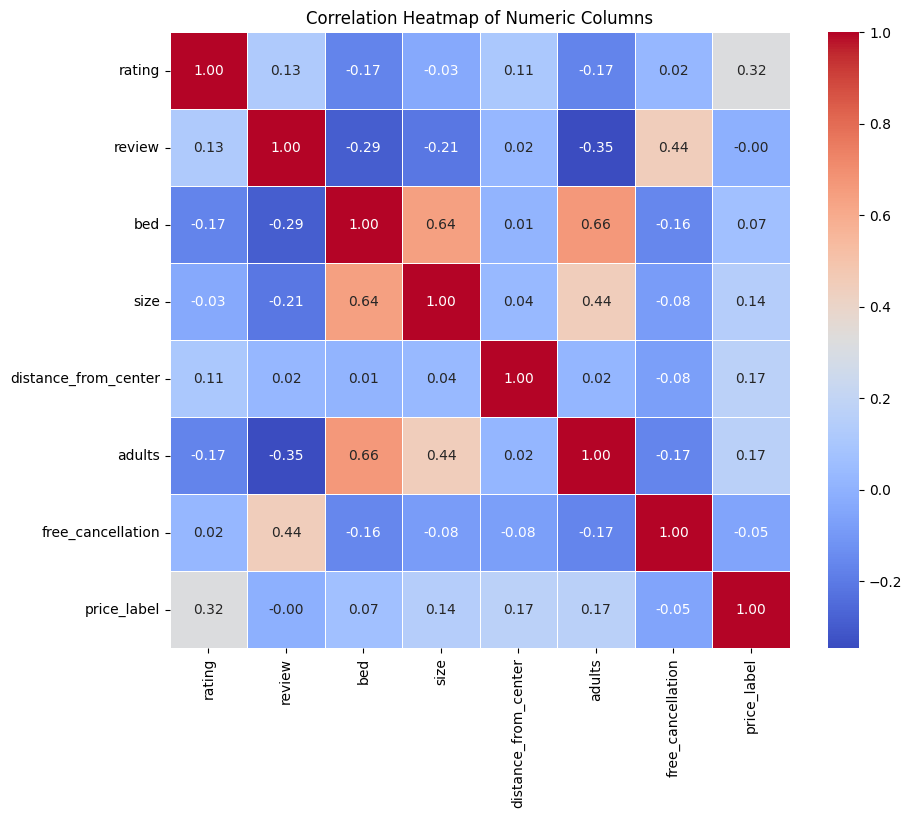

In [22]:
df_numeric = df[['rating', 'review', 'bed', 'size', 'distance_from_center', 'adults',
                 'free_cancellation', 'price_label']]
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

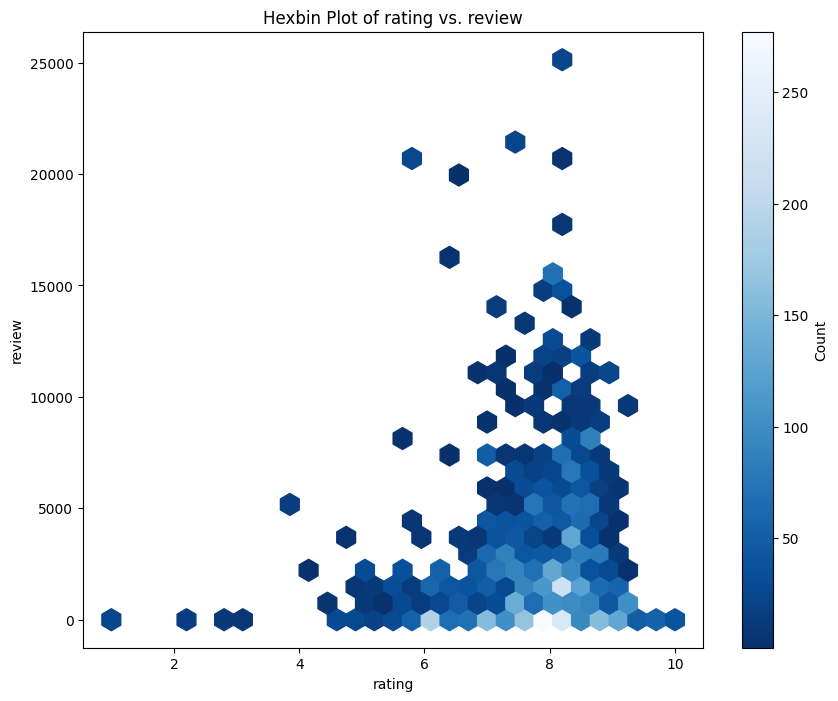

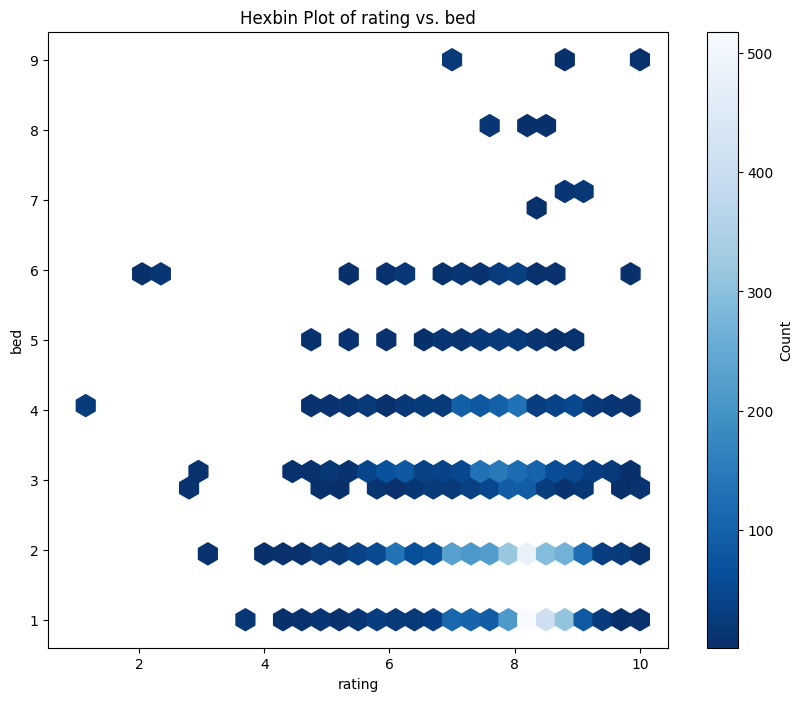

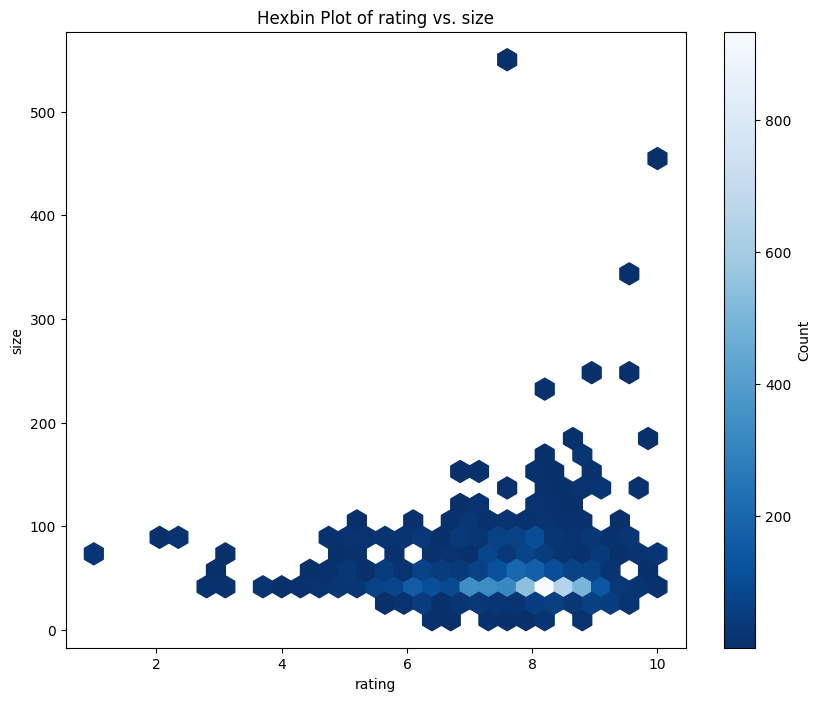

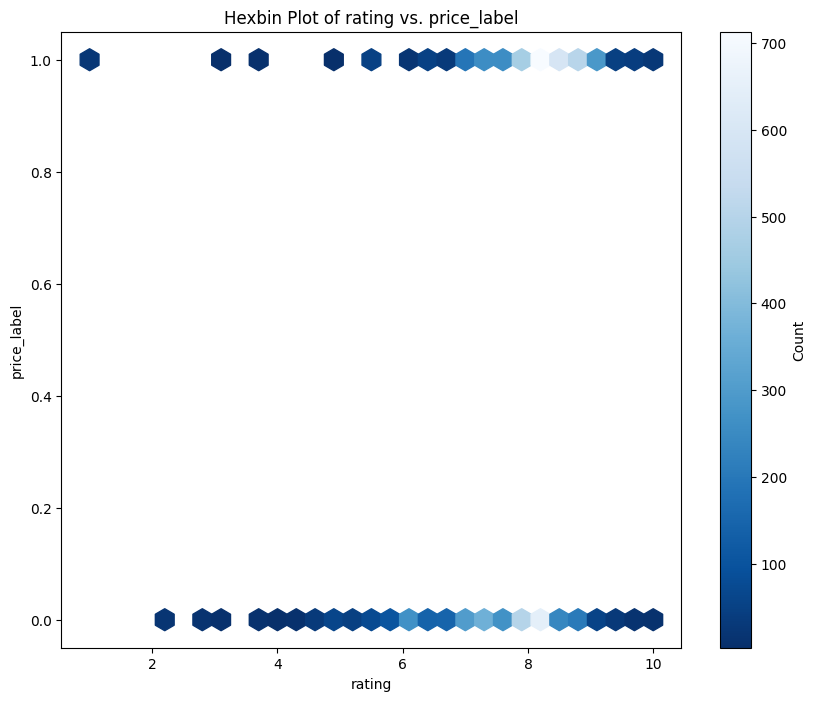

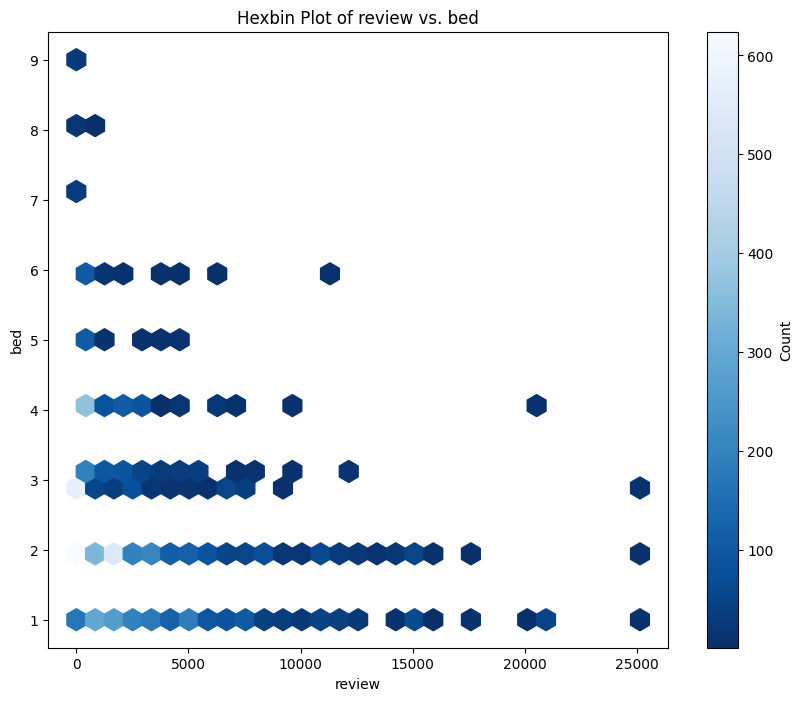

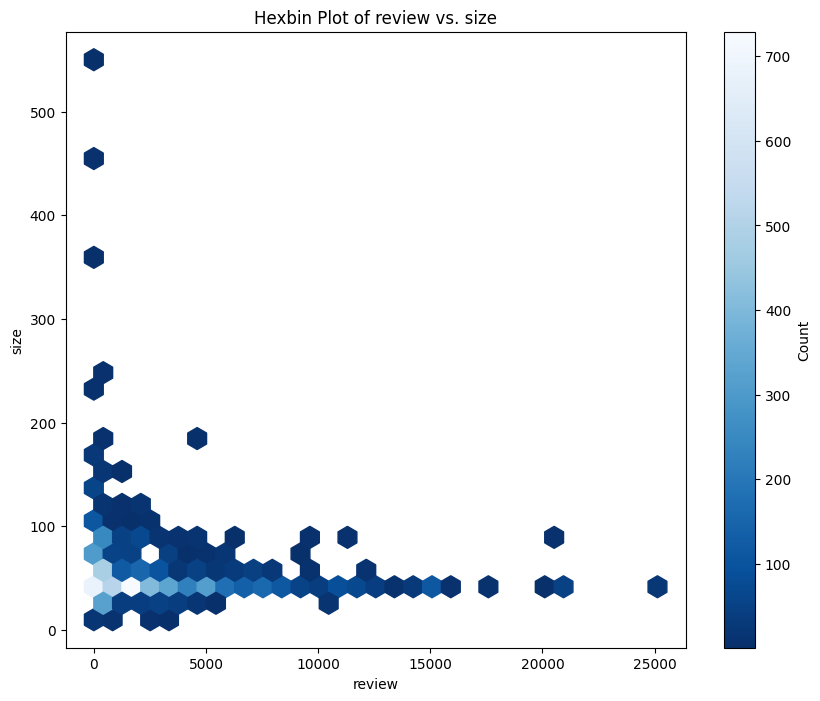

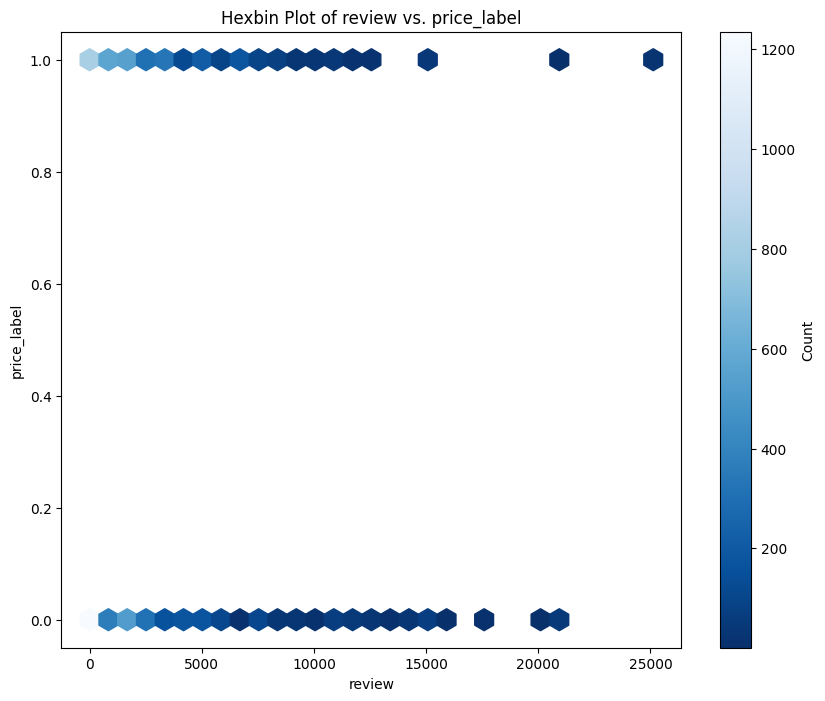

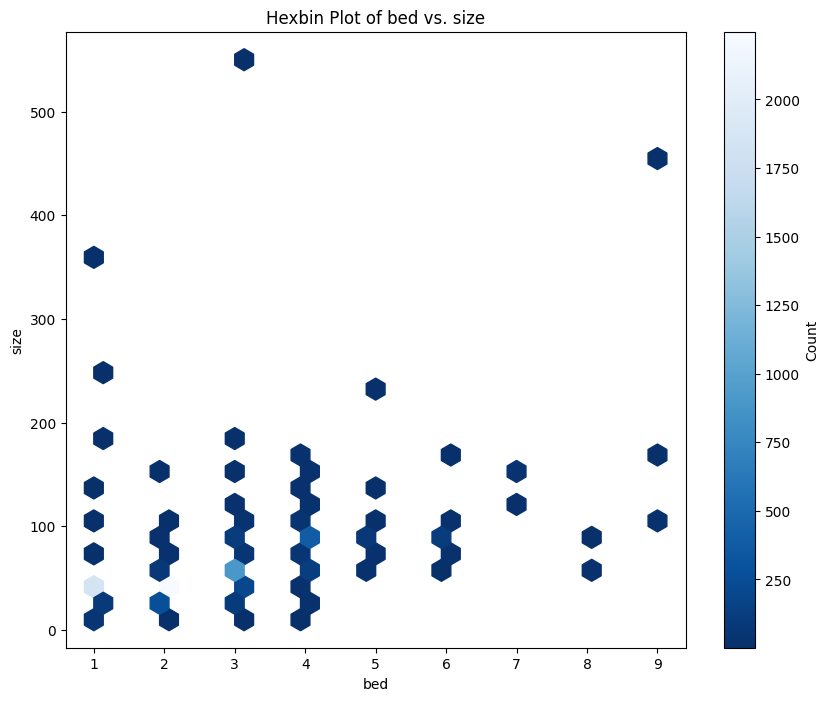

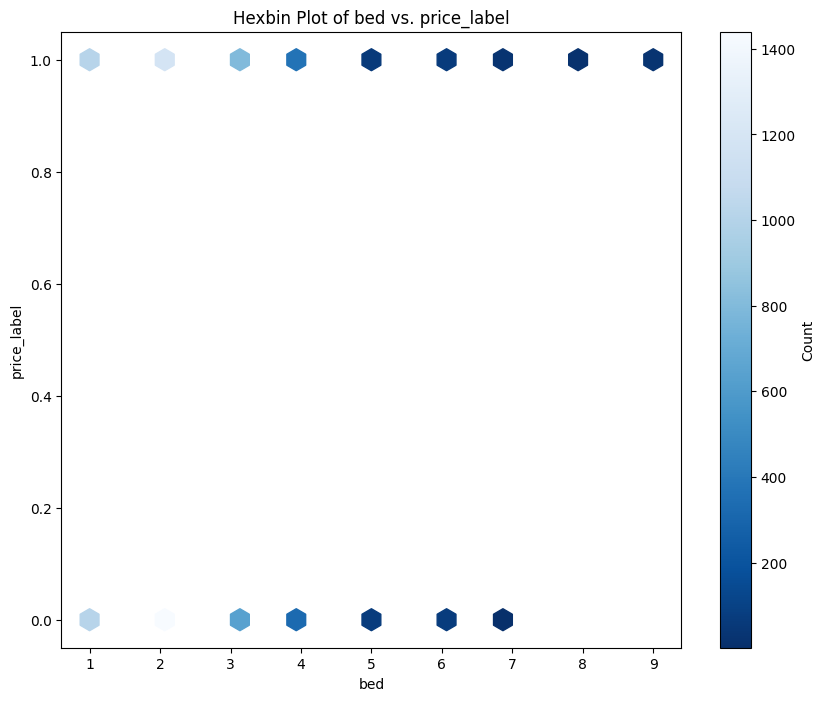

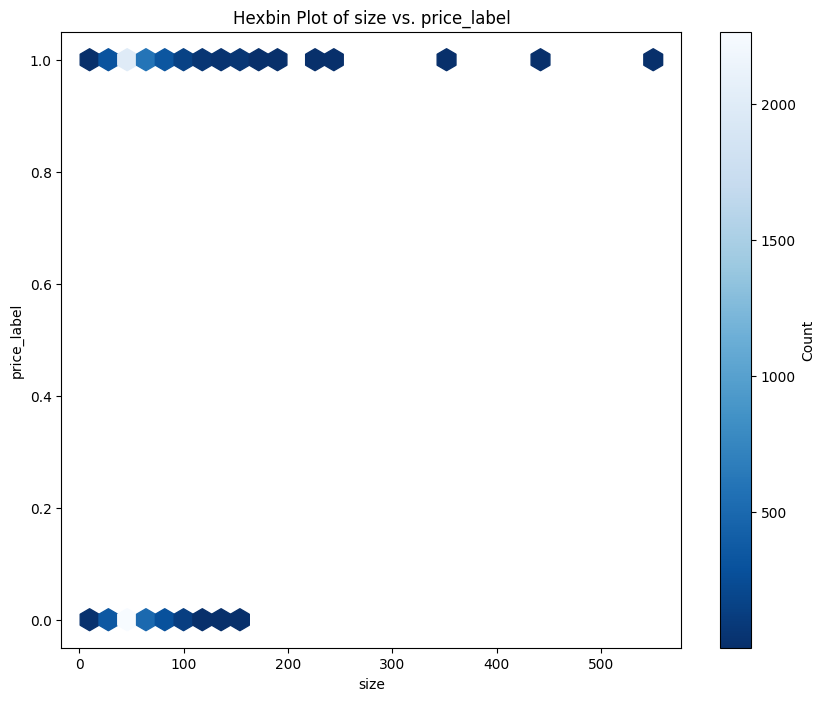

In [23]:
numeric_columns = ['rating', 'review', 'bed', 'size',
                    'price_label']

column_pairs = combinations(numeric_columns, 2)

for x_col, y_col in column_pairs:
    plt.figure(figsize=(10, 8))
    plt.hexbin(df[x_col], df[y_col], gridsize=30, cmap='Blues_r', mincnt=1)

    plt.colorbar(label='Count')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Hexbin Plot of {x_col} vs. {y_col}')
    plt.show()

## Scatter

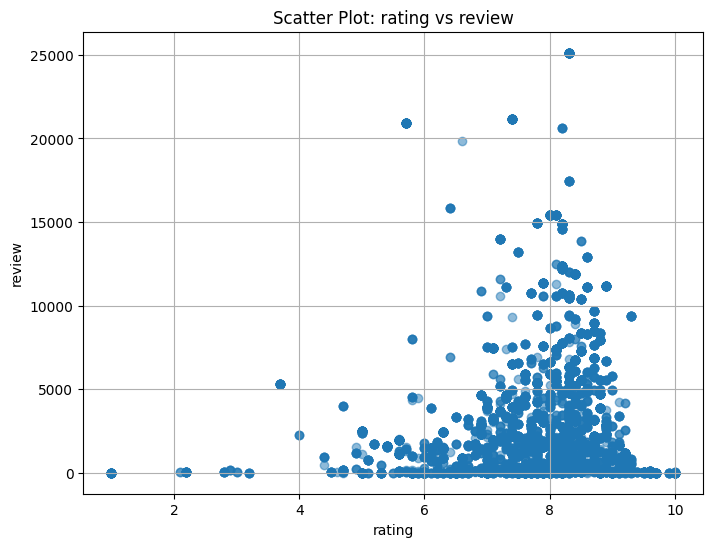

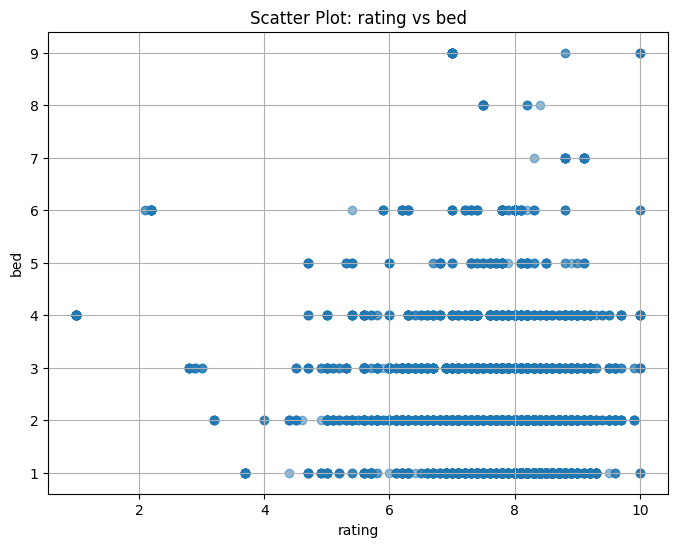

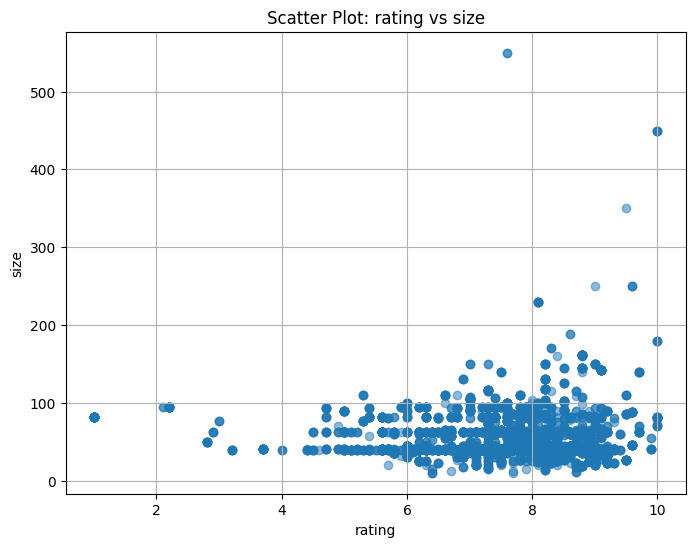

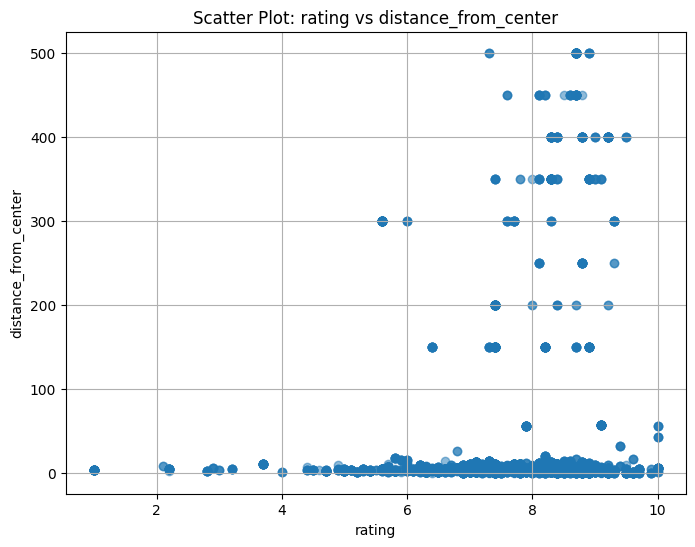

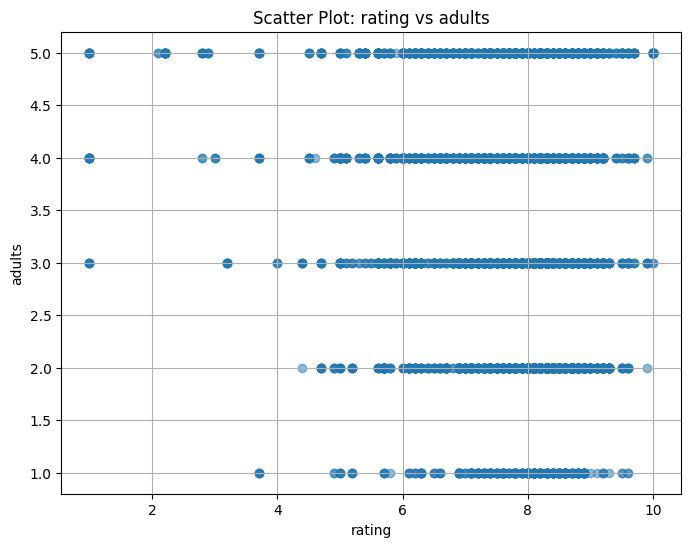

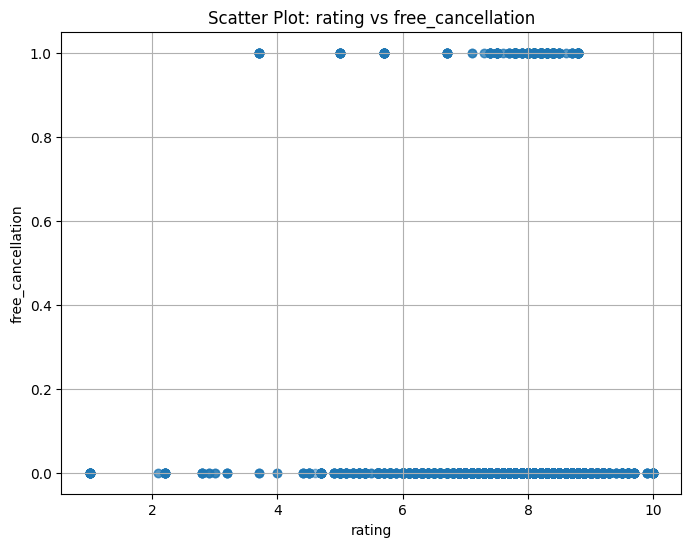

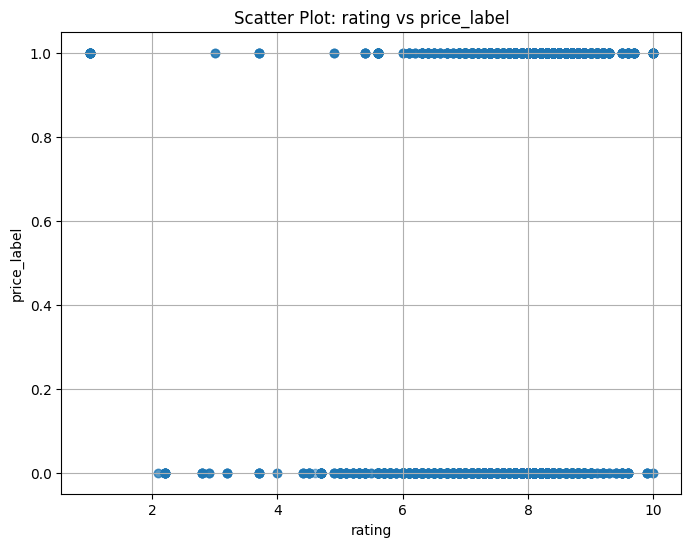

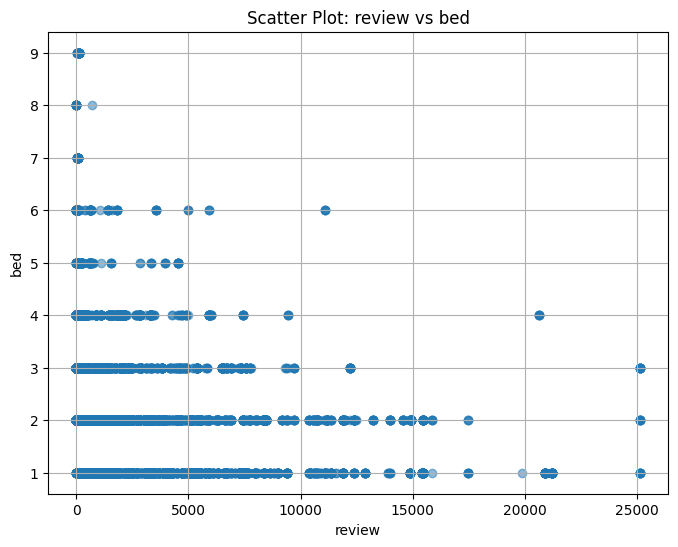

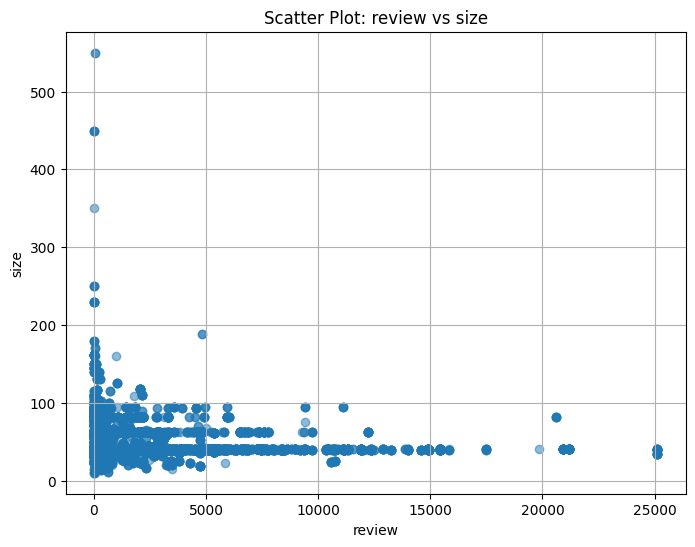

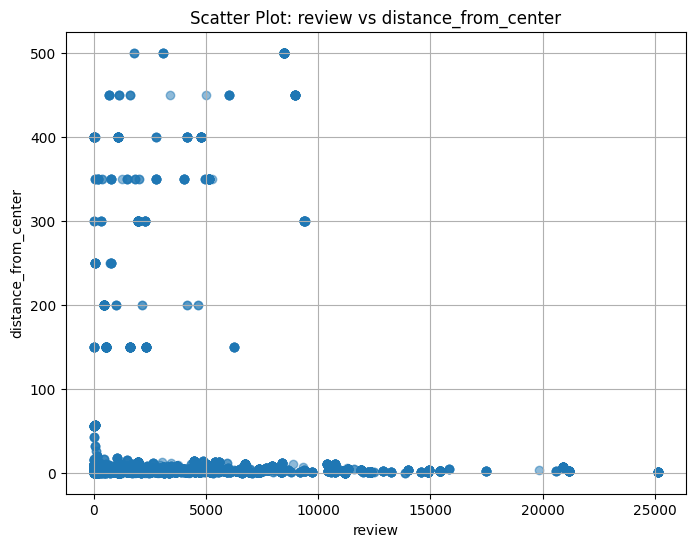

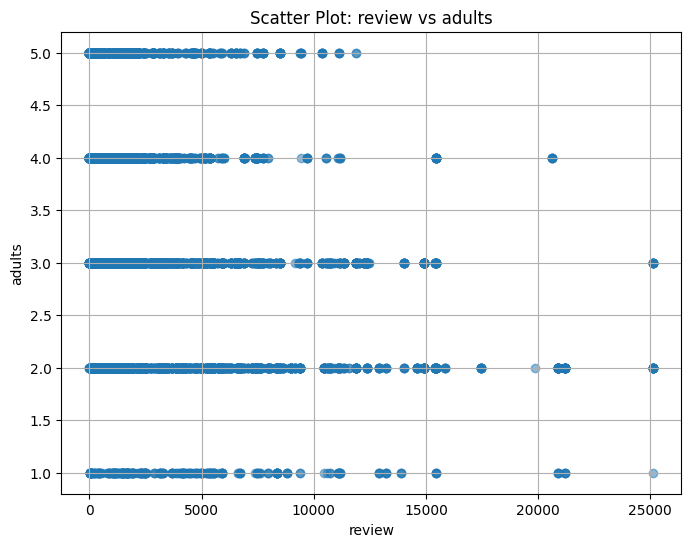

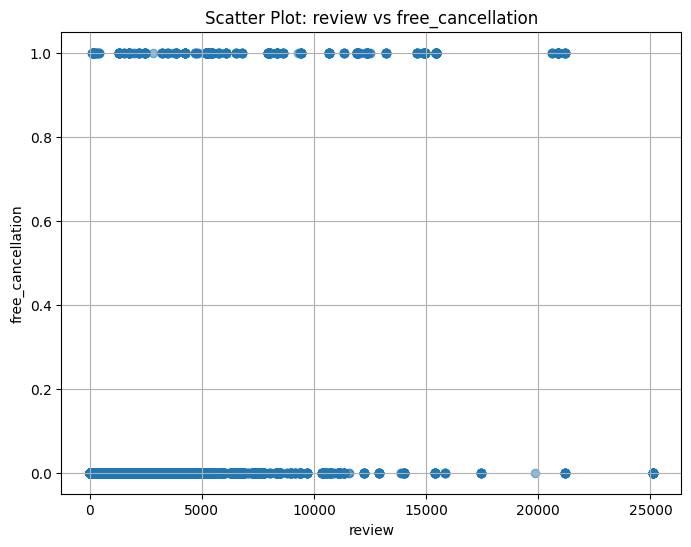

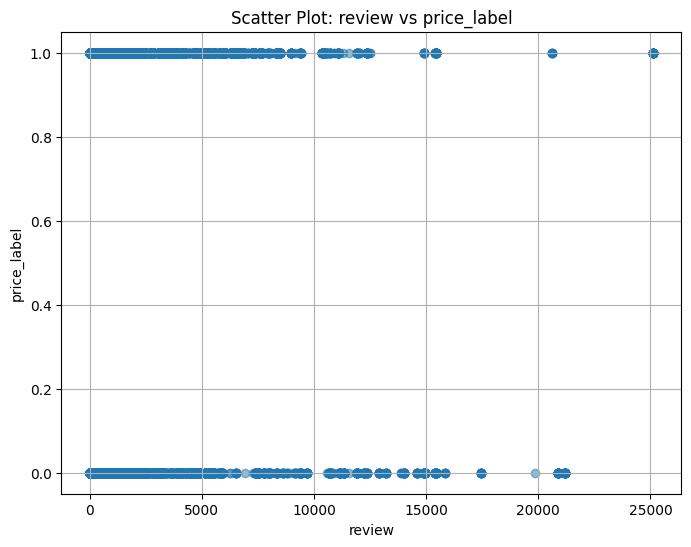

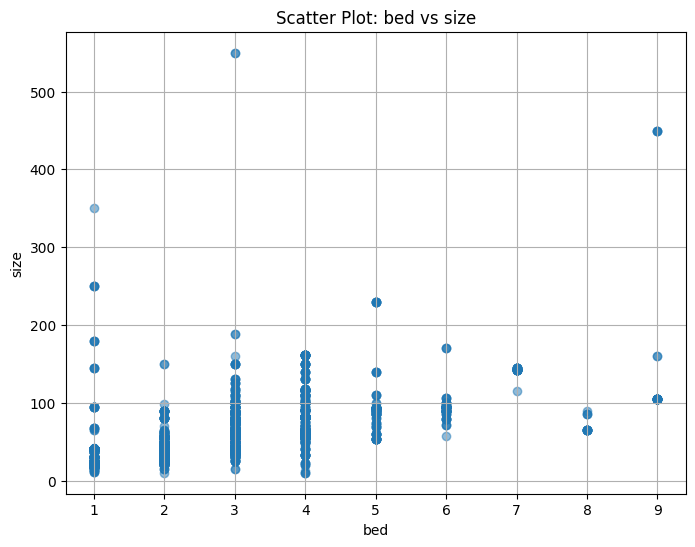

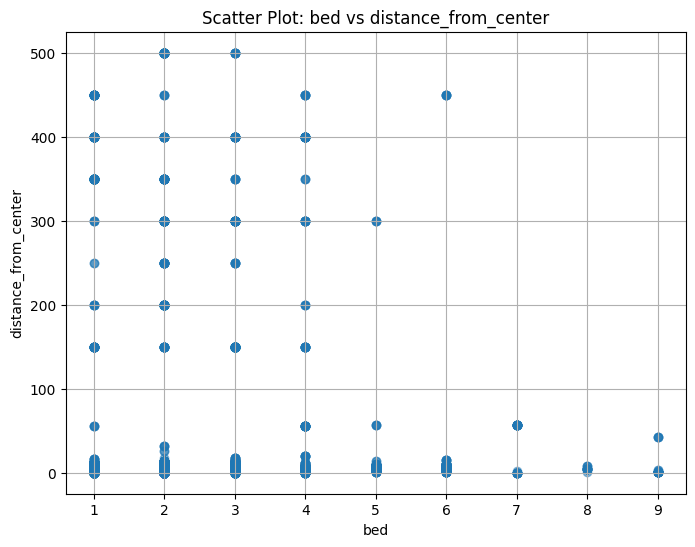

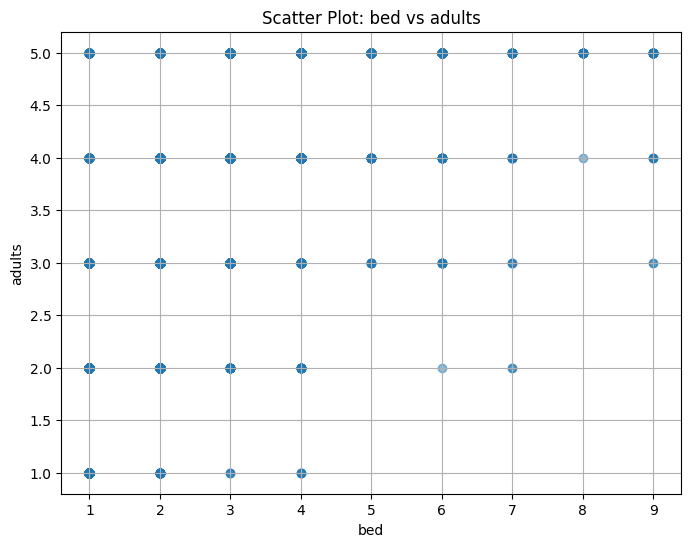

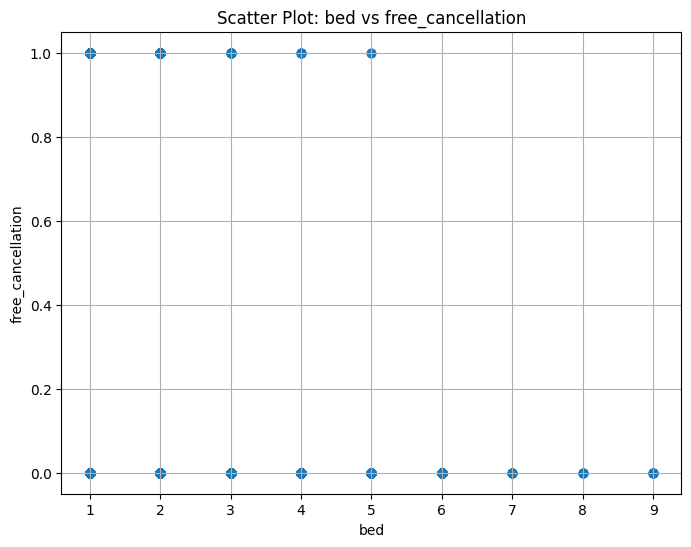

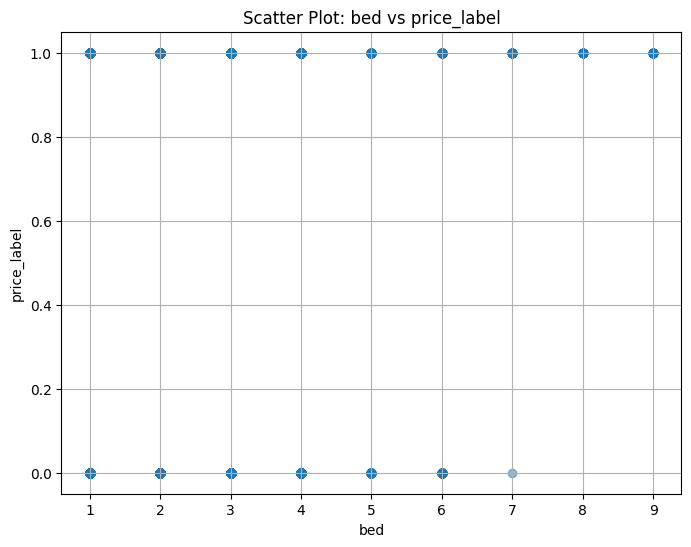

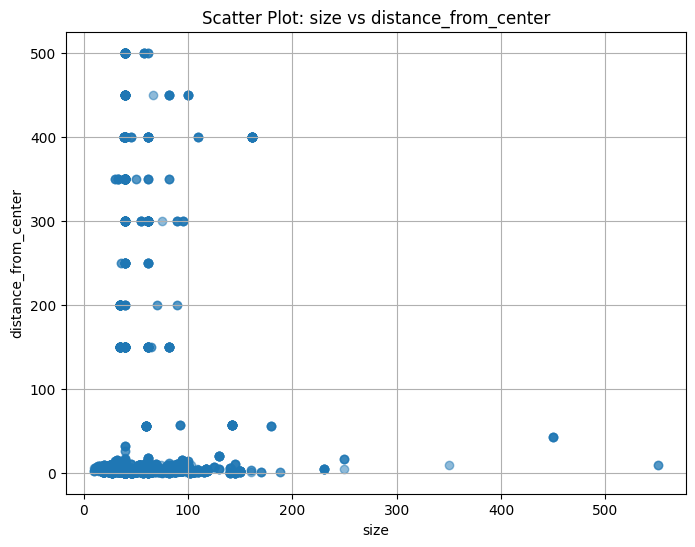

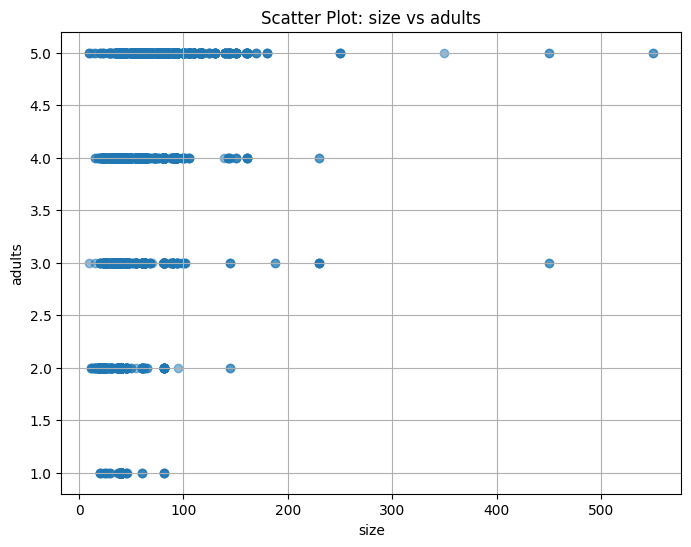

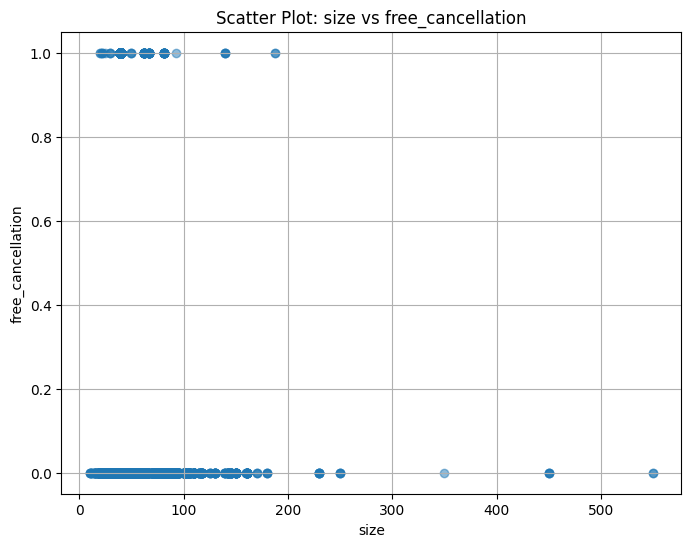

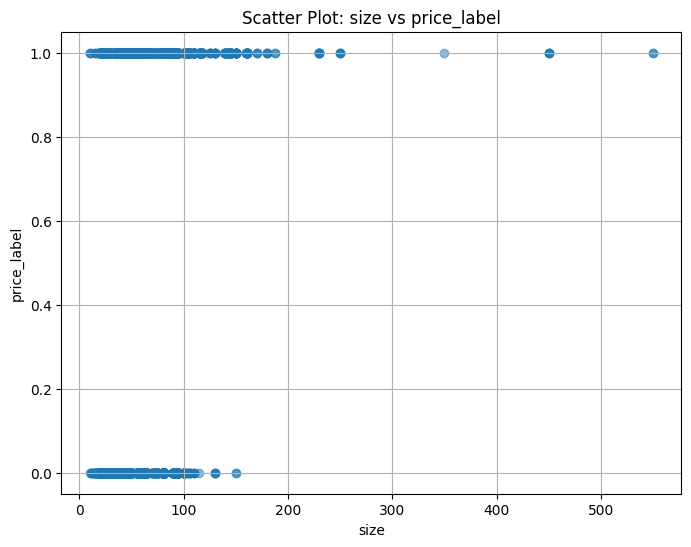

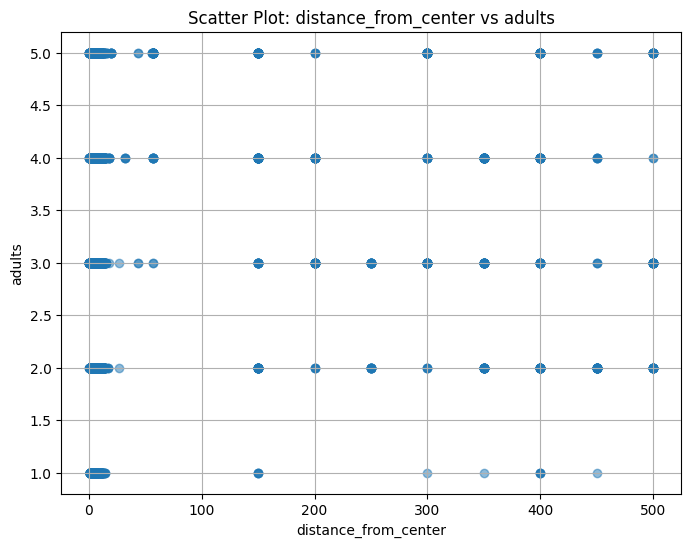

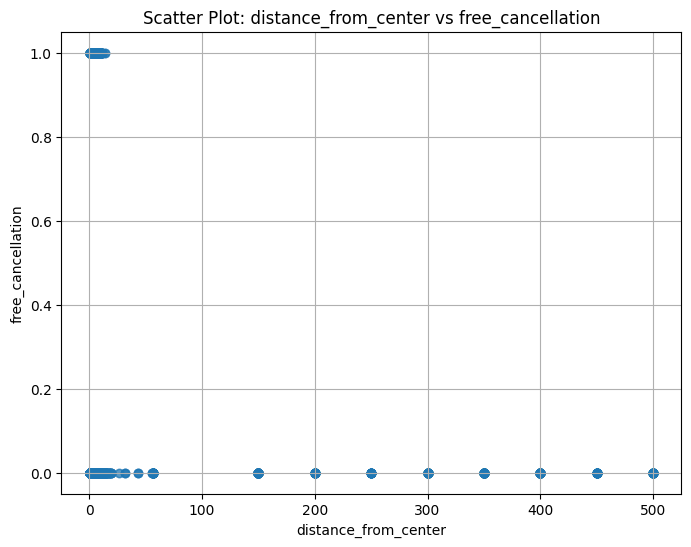

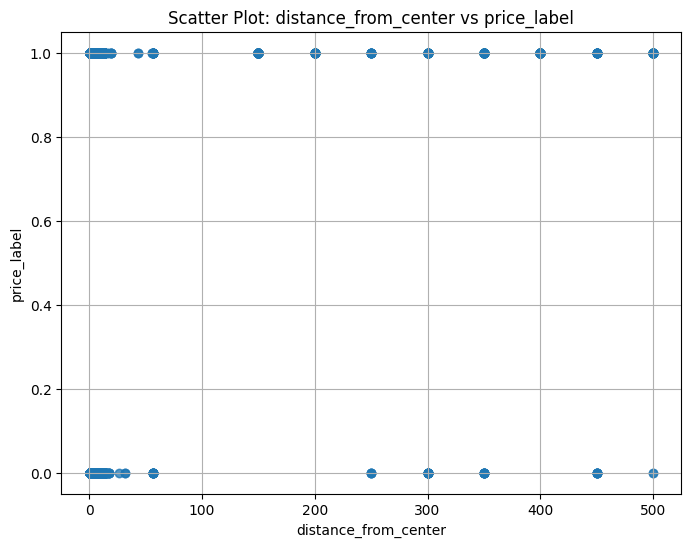

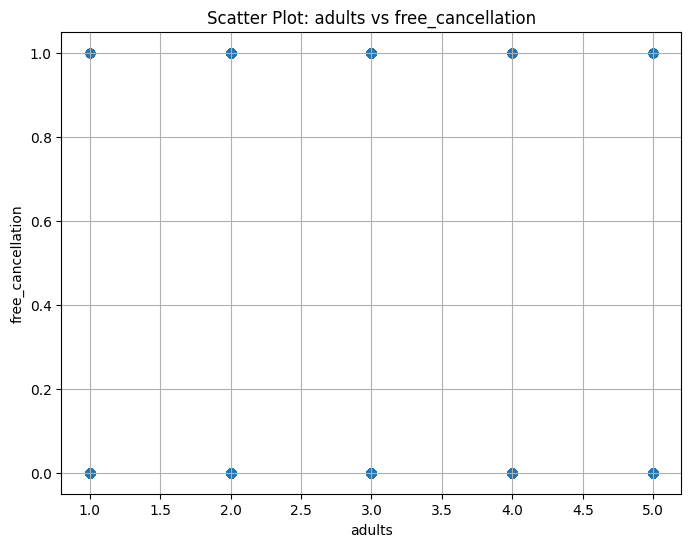

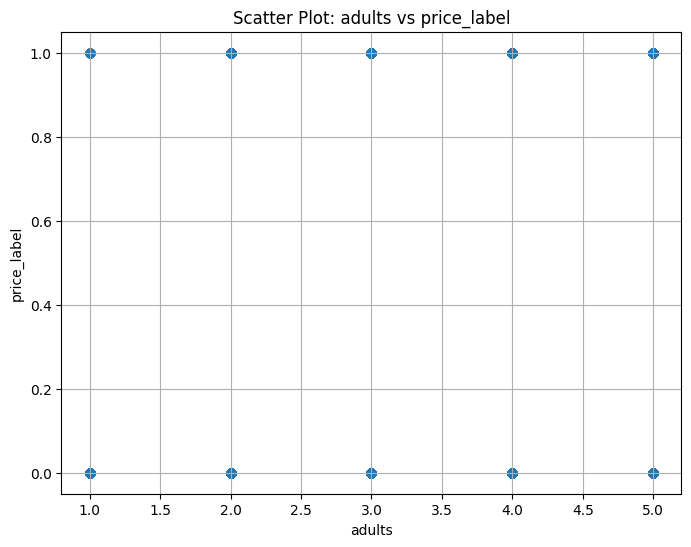

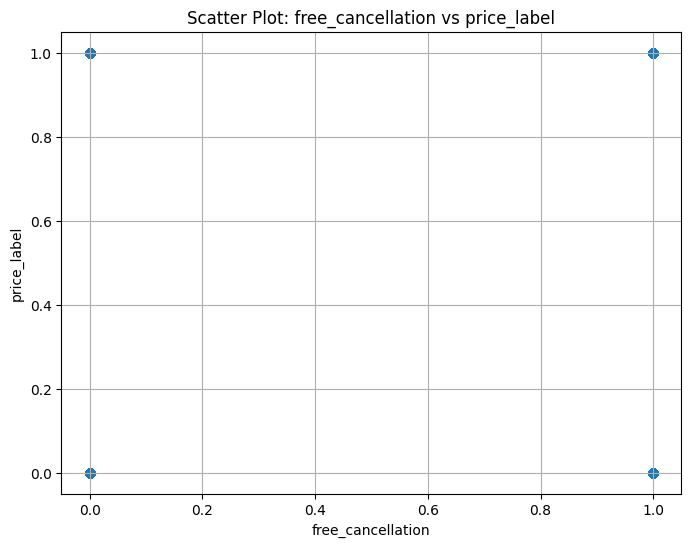

In [24]:
numeric_columns = ['rating', 'review', 'bed', 'size', 'distance_from_center', 'adults', 'free_cancellation', 'price_label']

combinations = list(itertools.combinations(numeric_columns, 2))
for col_x, col_y in combinations:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_x], df[col_y], alpha=0.5)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Scatter Plot: {col_x} vs {col_y}')
    plt.grid(True)
    plt.show()

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

In [25]:
#  encoding for columns that aren`t number
df = pd.get_dummies(df, columns=['city', 'area'], drop_first=True)
df.head()

,name,rating,review,bed,size,distance_from_center,adults,free_cancellation,price_label,city_London,...,area_Tempelhof-Schöneberg,area_Tetuan,area_Tower Hamlets,area_Treptow-Köpenick,area_Usera,area_Villaverde,area_Walthamstow,area_Wandsworth,area_Wembley,area_Westminster Borough
0,WIT Hotel,7.1,3300,1,20.000000,1.9,1,0,1,False,...,False,False,False,False,False,False,False,False,False,False
1,UCPA SPORT STATION HOSTEL PARIS,8.0,5921,1,40.152284,4.6,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False
2,Timhotel Montmartre,8.3,2532,1,40.152284,3.4,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False
3,Hôtel Galileo Champs Elysées,8.6,1457,1,40.152284,4.2,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,Hôtel Le Daum,8.3,1273,1,40.152284,4.1,1,0,0,False,...,False,False,False,False,False,False,False,False,False,False


### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [26]:
# MINmax:
    # from sklearn.preprocessing import MinMaxScaler, StandardScaler
    # numeric_columns = ['rating', 'review', 'bed', 'size', 'distance_from_center', 'adults', 'free_cancellation', 'price_label']
    # df_numeric = df[numeric_columns]
    # scaler = MinMaxScaler()
    # df_normalized = scaler.fit_transform(df_numeric)
    # df_normalized = pd.DataFrame(df_normalized, columns=numeric_columns)
    # for col in numeric_columns:
    #     df[col] = df_normalized[col]
#Standard Scaler:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['rating', 'review', 'bed', 'size', 'distance_from_center', 'adults', 'free_cancellation']
standard_scaler = StandardScaler()
df[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

df.head() 



,name,rating,review,bed,size,distance_from_center,adults,free_cancellation,price_label,city_London,...,area_Tempelhof-Schöneberg,area_Tetuan,area_Tower Hamlets,area_Treptow-Köpenick,area_Usera,area_Villaverde,area_Walthamstow,area_Wandsworth,area_Wembley,area_Westminster Borough
0,WIT Hotel,-0.569396,0.060789,-1.026135,-1.168005,-0.279903,-1.922301,-0.298433,1,False,...,False,False,False,False,False,False,False,False,False,False
1,UCPA SPORT STATION HOSTEL PARIS,0.227850,0.722544,-1.026135,-0.415832,-0.247556,-1.922301,-0.298433,0,False,...,False,False,False,False,False,False,False,False,False,False
2,Timhotel Montmartre,0.493599,-0.133117,-1.026135,-0.415832,-0.261933,-1.922301,-0.298433,0,False,...,False,False,False,False,False,False,False,False,False,False
3,Hôtel Galileo Champs Elysées,0.759348,-0.404535,-1.026135,-0.415832,-0.252348,-1.922301,-0.298433,0,False,...,False,False,False,False,False,False,False,False,False,False
4,Hôtel Le Daum,0.493599,-0.450991,-1.026135,-0.415832,-0.253546,-1.922301,-0.298433,0,False,...,False,False,False,False,False,False,False,False,False,False


### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [27]:


X = df.drop(columns=['price_label', 'name']) 
y = df['price_label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# print("Training set size:", X_train.shape)
# print("Test set size:", X_test.shape)
print(f'X train: {len(X_train)}')
print(f'X test: {len(X_test)}')
print(f'Y train: {len(y_train)}')
print(f'Y test: {len(y_test)}')


X train: 5703
X test: 1426
Y train: 5703
Y test: 1426


### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

In [28]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
def print_micro_informaions(y_pred):
    micro_precision = round(precision_score(y_test, y_pred, average='micro'), 2)
    micro_recall = round(recall_score(y_test, y_pred, average='micro'), 2)
    micro_f1 = round(f1_score(y_test, y_pred, average='micro'), 2)
    print("micro avg\t  ", micro_precision, "    ", micro_recall, "    ", micro_f1)

Accuracy: 0.6164095371669004

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.30      0.44       712
           1       0.57      0.94      0.71       714

    accuracy                           0.62      1426
   macro avg       0.70      0.62      0.57      1426
weighted avg       0.70      0.62      0.57      1426

Confusion Matrix:
 [[211 501]
 [ 46 668]]
micro avg	   0.62      0.62      0.62


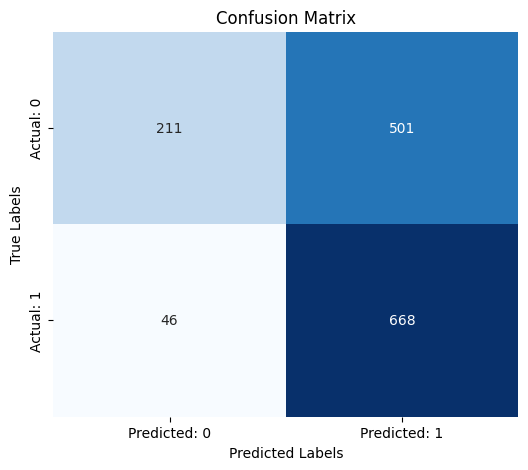

In [29]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)

print_micro_informaions(y_pred)
#Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### 🌳 Decision Tree Classifier

micro avg	   0.97      0.97      0.97
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       712
           1       0.97      0.97      0.97       714

    accuracy                           0.97      1426
   macro avg       0.97      0.97      0.97      1426
weighted avg       0.97      0.97      0.97      1426

Confusion Matrix:
[[687  25]
 [ 22 692]]


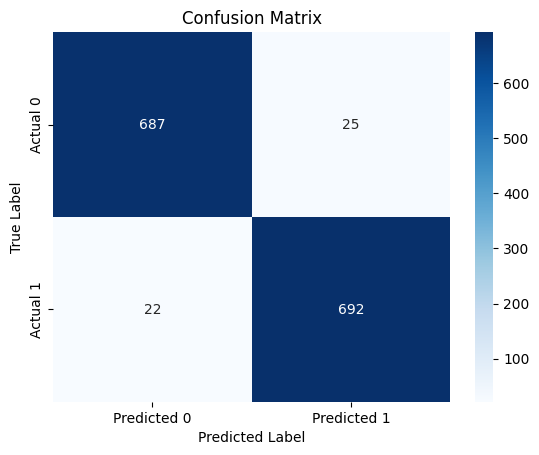

In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print_micro_informaions(y_pred)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

#heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


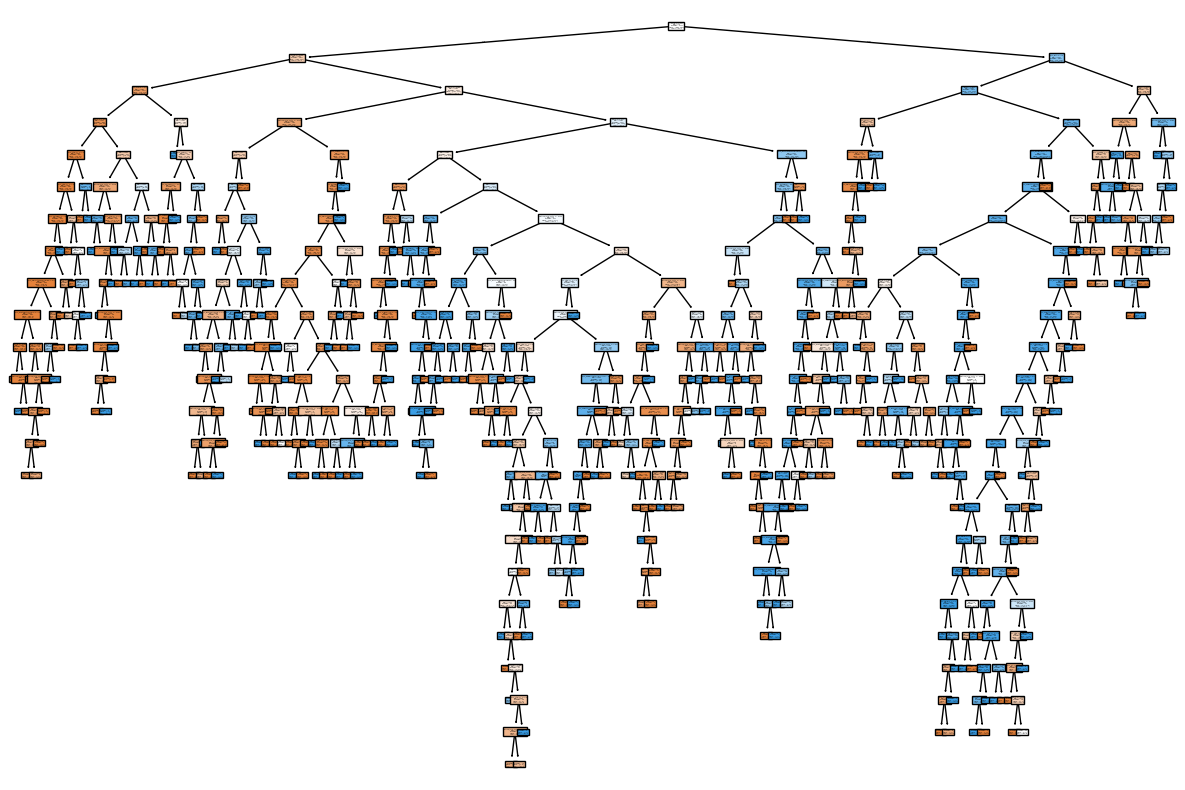

In [31]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

#### 🌲🌳 Random Forest Classifier 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
micro avg	   0.97      0.97      0.97
Accuracy: 97.19%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       712
           1       0.98      0.97      0.97       714

    accuracy                           0.97      1426
   macro avg       0.97      0.97      0.97      1426
weighted avg       0.97      0.97      0.97      1426

Confusion Matrix:
[[695  17]
 [ 23 691]]


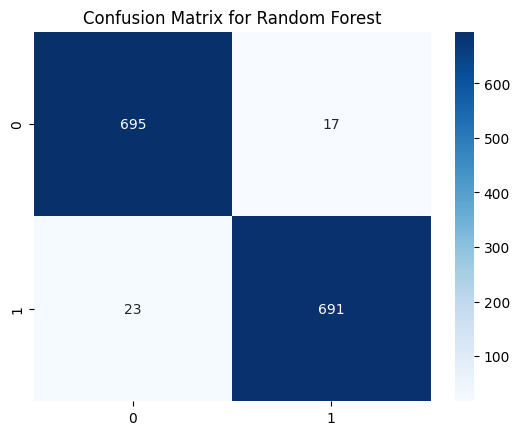

Best Parameters from RandomizedSearchCV:
{'bootstrap': False, 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}


In [32]:

param_dist = {
    'n_estimators': randint(50, 150),    
    'max_depth': randint(5, 20),           
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),     
    'bootstrap': [True, False]            
}

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,       
    verbose=2,
    random_state=42,
    n_jobs=-1   
)

random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print_micro_informaions(y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Random Forest')
plt.show()
print("Best Parameters from RandomizedSearchCV:")
print(random_search.best_params_)


#### ⚡️ Adaptive Boosting

Training AdaBoost with 50 estimators...
Accuracy with 50 estimators: 75.18%
Training AdaBoost with 100 estimators...
Accuracy with 100 estimators: 76.86%
Training AdaBoost with 200 estimators...
Accuracy with 200 estimators: 78.26%
Classification Report for 50 estimators:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       712
           1       0.76      0.74      0.75       714

    accuracy                           0.75      1426
   macro avg       0.75      0.75      0.75      1426
weighted avg       0.75      0.75      0.75      1426



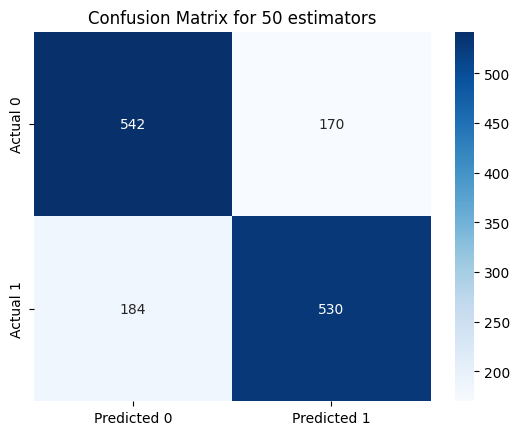

Classification Report for 100 estimators:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       712
           1       0.76      0.78      0.77       714

    accuracy                           0.77      1426
   macro avg       0.77      0.77      0.77      1426
weighted avg       0.77      0.77      0.77      1426



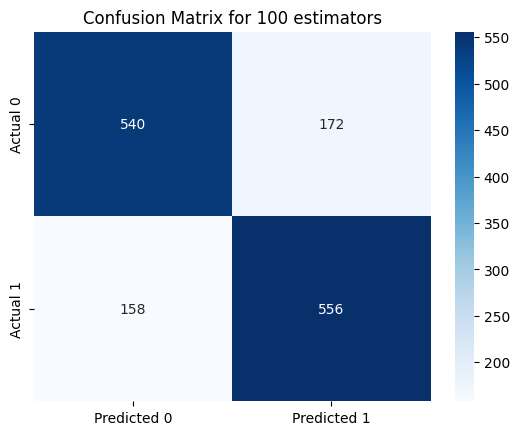

Classification Report for 200 estimators:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       712
           1       0.78      0.80      0.79       714

    accuracy                           0.78      1426
   macro avg       0.78      0.78      0.78      1426
weighted avg       0.78      0.78      0.78      1426



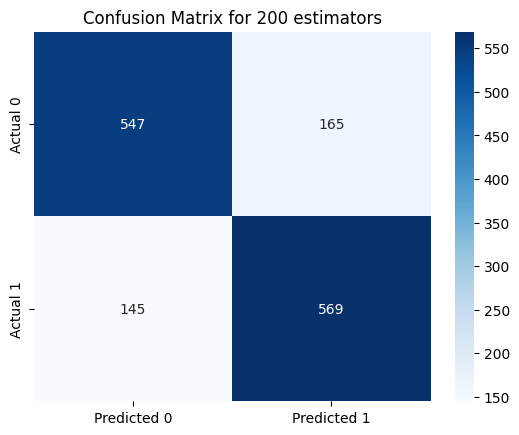

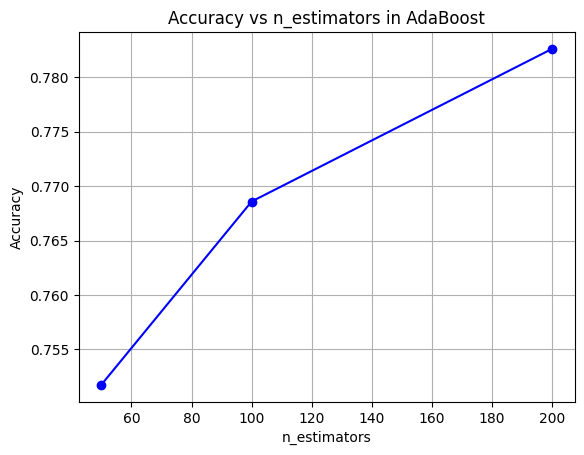

In [33]:

def evaluate_adaboost(n_estimators_values, X_train, y_train, X_test, y_test):
    results = {}

    for n_estimators in n_estimators_values:
        print(f"Training AdaBoost with {n_estimators} estimators...")
        ada_boost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
        ada_boost.fit(X_train, y_train)
        y_pred = ada_boost.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        clf_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results[n_estimators] = {
            'accuracy': accuracy,
            'classification_report': clf_report,
            'confusion_matrix': conf_matrix
        }

        print(f"Accuracy with {n_estimators} estimators: {accuracy * 100:.2f}%")

    accuracies = [results[n]['accuracy'] for n in n_estimators_values]

    for n in n_estimators_values:
        print(f"Classification Report for {n} estimators:")
        print(results[n]['classification_report'])

        sns.heatmap(results[n]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted 0', 'Predicted 1'], 
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f'Confusion Matrix for {n} estimators')
        plt.show()

    plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs n_estimators in AdaBoost')
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

evaluate_adaboost([50, 100, 200], X_train, y_train, X_test, y_test)


#### ⚡️ XGBoost

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9123291357227424
Accuracy: 91.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       712
           1       0.90      0.92      0.91       714

    accuracy                           0.91      1426
   macro avg       0.91      0.91      0.91      1426
weighted avg       0.91      0.91      0.91      1426

Confusion Matrix:
[[642  70]
 [ 56 658]]


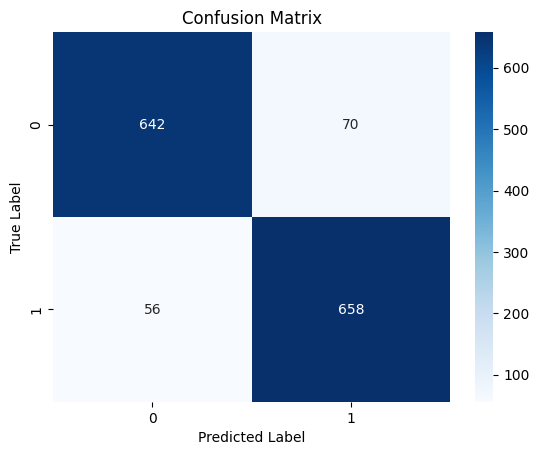

In [34]:

xgbrf = GradientBoostingClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [3, 5],
    'max_features': ['sqrt', 'log2']  
}

grid_search = GridSearchCV(estimator=xgbrf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()




### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [35]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np

class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1 / n_samples) * np.ones(n_samples, dtype=float)
        n_classes = len(np.unique(y))

        for _ in range(self.n_estimators):
            learner = GaussianNB()
            learner.fit(X, y, sample_weight=self.weights)
            pred = learner.predict(X)
            missClassified = pred != y

            errorRate = np.sum(self.weights[missClassified]) / np.sum(self.weights)

            learnerWeight = 0.5 * np.log((1 - errorRate) / (errorRate + 1e-10))

            if errorRate >= 1 - (1 / n_classes):
                continue

            self.weights[missClassified] *= np.exp(learnerWeight)
            self.weights /= np.sum(self.weights)

            self.learners.append(learner)
            self.learner_weights.append(learnerWeight)

    def predict(self, X):
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X))

        weighted_votes = np.zeros((X.shape[0], len(self.learners[0].classes_)))
        for i, learner in enumerate(self.learners):
            pred = learner.predict(X)
            for j, label in enumerate(learner.classes_):
                weighted_votes[:, j] += (pred == label) * self.learner_weights[i]

        final_prediction = np.argmax(weighted_votes, axis=1)
        return final_prediction


c:\Users\ASUS\OneDrive\Desktop\AI_CA3\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


micro avg	   0.75      0.75      0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       712
           1       0.76      0.74      0.75       714

    accuracy                           0.75      1426
   macro avg       0.75      0.75      0.75      1426
weighted avg       0.75      0.75      0.75      1426



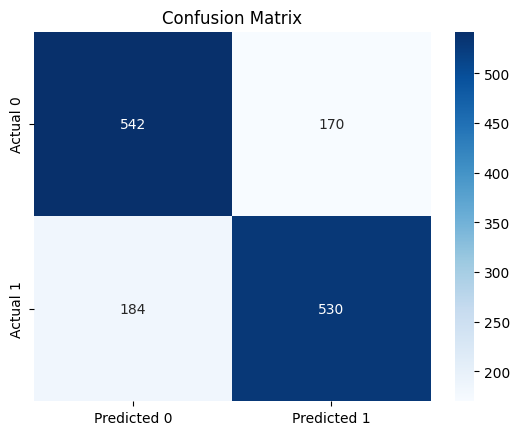

micro avg	   0.61      0.61      0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.26      0.40       712
           1       0.57      0.96      0.71       714

    accuracy                           0.61      1426
   macro avg       0.72      0.61      0.56      1426
weighted avg       0.72      0.61      0.56      1426



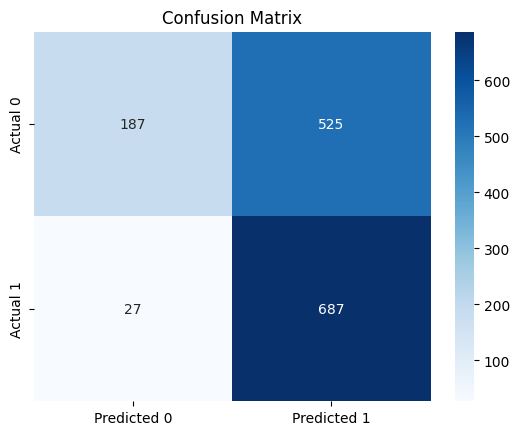

In [36]:
ada_boost_samme = AdaBoostClassifier(random_state=20, algorithm='SAMME')

ada_boost_samme.fit(X_train, y_train)

y_pred = ada_boost_samme.predict(X_test)

print_micro_informaions(y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()



boosting_model = SimpleMultiClassBoosting(base_estimator=GaussianNB, n_estimators=50)

boosting_model.fit(X_train, y_train)

y_pred = boosting_model.predict(X_test)

print_micro_informaions(y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()